In [1]:
import pandas as pd
# 파일을 DataFrame으로 읽어오는 코드 예시
df = pd.read_csv("//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_50/total/results/experiment_results.txt", sep=", ")

# 데이터 타입 변환
df["ACC Mean"] = df["ACC Mean"].astype(float)
df["ACC Std"] = df["ACC Std"].astype(float)
df["ECE Mean"] = df["ECE Mean"].astype(float)
df["ECE Std"] = df["ECE Std"].astype(float)

# DataFrame 확인
df.head()


/tmp/ipykernel_2933215/4286348620.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_50/total/results/experiment_results.txt", sep=", ")


KD Method Teacher Calibration Student Calibration        Mixup  ACC Mean  \
0       VKD               TNone                  CE  Mixup=False     39.94   
1       VKD               TNone                 ALS  Mixup=False     39.25   
2       VKD               TNone                  CP  Mixup=False     39.33   
3       VKD               TNone                  BS  Mixup=False     38.61   
4       VKD                TALS                  CE  Mixup=False     39.80   

   ACC Std  ECE Mean  ECE Std  
0     0.81    0.1611   0.0084  
1     1.42    0.1702   0.0084  
2     0.70    0.1992   0.0197  
3     0.36    0.1734   0.0171  
4     0.65    0.1741   0.0067

In [2]:
df

KD Method Teacher Calibration Student Calibration        Mixup  ACC Mean  \
0         VKD               TNone                  CE  Mixup=False     39.94   
1         VKD               TNone                 ALS  Mixup=False     39.25   
2         VKD               TNone                  CP  Mixup=False     39.33   
3         VKD               TNone                  BS  Mixup=False     38.61   
4         VKD                TALS                  CE  Mixup=False     39.80   
..        ...                 ...                 ...          ...       ...   
123        AT              TCP_MX                  BS   Mixup=True     39.84   
124        AT              TBS_MX                  CE   Mixup=True     40.41   
125        AT              TBS_MX                 ALS   Mixup=True     33.01   
126        AT              TBS_MX                  CP   Mixup=True     40.93   
127        AT              TBS_MX                  BS   Mixup=True     40.98   

     ACC Std  ECE Mean  ECE Std  
0       0.81    0.1611   0.0084  
1       1.42    0.1702   0.0084  
2       0.70    0.1992   0.0197  
3       0.36    0.1734   0.0171  
4       0.65    0.1741   0.0067  
..       ...       ...      ...  
123     0.87    0.1525   0.0144  
124     0.28    0.1532   0.0014  
125     0.47    0.1372   0.0173  
126     0.33    0.1596   0.0007  
127     0.65    0.1529   0.0091  

[128 rows x 8 columns]

In [3]:
# ACC Mean 상위 5개와 하위 5개 추출
top_5_acc = df.nlargest(5, "ACC Mean")
bottom_5_acc = df.nsmallest(5, "ACC Mean")

# ECE Mean 상위 5개 (값이 낮을수록 좋음)와 하위 5개 추출
top_5_ece = df.nsmallest(5, "ECE Mean")
bottom_5_ece = df.nlargest(5, "ECE Mean")

# 결과 테이블 출력
print("Top 5 ACC Mean:")
print(top_5_acc)

print("\nBottom 5 ACC Mean:")
print(bottom_5_acc)

print("\nTop 5 ECE Mean (Lowest):")
print(top_5_ece)

print("\nBottom 5 ECE Mean (Highest):")
print(bottom_5_ece)

Top 5 ACC Mean:
   KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
55       CRD             TALS_MX                  BS  Mixup=True     43.75   
48       CRD            TNone_MX                  CE  Mixup=True     43.58   
59       CRD              TCP_MX                  BS  Mixup=True     43.54   
63       CRD              TBS_MX                  BS  Mixup=True     43.18   
51       CRD            TNone_MX                  BS  Mixup=True     43.17   

    ACC Std  ECE Mean  ECE Std  
55     0.22    0.1488   0.0015  
48     0.36    0.1526   0.0039  
59     0.65    0.1572   0.0019  
63     0.61    0.1526   0.0046  
51     0.39    0.1566   0.0067  

Bottom 5 ACC Mean:
    KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
21        VKD             TALS_MX                 ALS  Mixup=True     32.32   
17        VKD            TNone_MX                 ALS  Mixup=True     32.58   
125        AT              TBS_MX                 ALS  Mixup

In [4]:
import pandas as pd

# 데이터 정규화
df["Normalized ACC"] = (df["ACC Mean"] - df["ACC Mean"].min()) / (df["ACC Mean"].max() - df["ACC Mean"].min())
df["Normalized ECE"] = (df["ECE Mean"] - df["ECE Mean"].min()) / (df["ECE Mean"].max() - df["ECE Mean"].min())

# 정규화된 조화평균 계산
df["Normalized Harmonic Score"] = 2 * (
    df["Normalized ACC"] * (1 - df["Normalized ECE"])
) / (df["Normalized ACC"] + (1 - df["Normalized ECE"]))

# 상위 및 하위 5개 추출
top_5_normalized = df.nlargest(5, "Normalized Harmonic Score")
bottom_5_normalized = df.nsmallest(5, "Normalized Harmonic Score")

# 결과 출력
print("Top 5 Normalized Harmonic Scores:")
print(top_5_normalized)

print("\nBottom 5 Normalized Harmonic Scores:")
print(bottom_5_normalized)


Top 5 Normalized Harmonic Scores:
   KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
55       CRD             TALS_MX                  BS  Mixup=True     43.75   
60       CRD              TBS_MX                  CE  Mixup=True     42.84   
48       CRD            TNone_MX                  CE  Mixup=True     43.58   
63       CRD              TBS_MX                  BS  Mixup=True     43.18   
52       CRD             TALS_MX                  CE  Mixup=True     42.59   

    ACC Std  ECE Mean  ECE Std  Normalized ACC  Normalized ECE  \
55     0.22    0.1488   0.0015        1.000000        0.251483   
60     0.61    0.1453   0.0051        0.920385        0.209964   
48     0.36    0.1526   0.0039        0.985127        0.296560   
63     0.61    0.1526   0.0046        0.950131        0.296560   
52     0.25    0.1506   0.0039        0.898513        0.272835   

    Normalized Harmonic Score  
55                   0.856174  
60                   0.850243  
48  

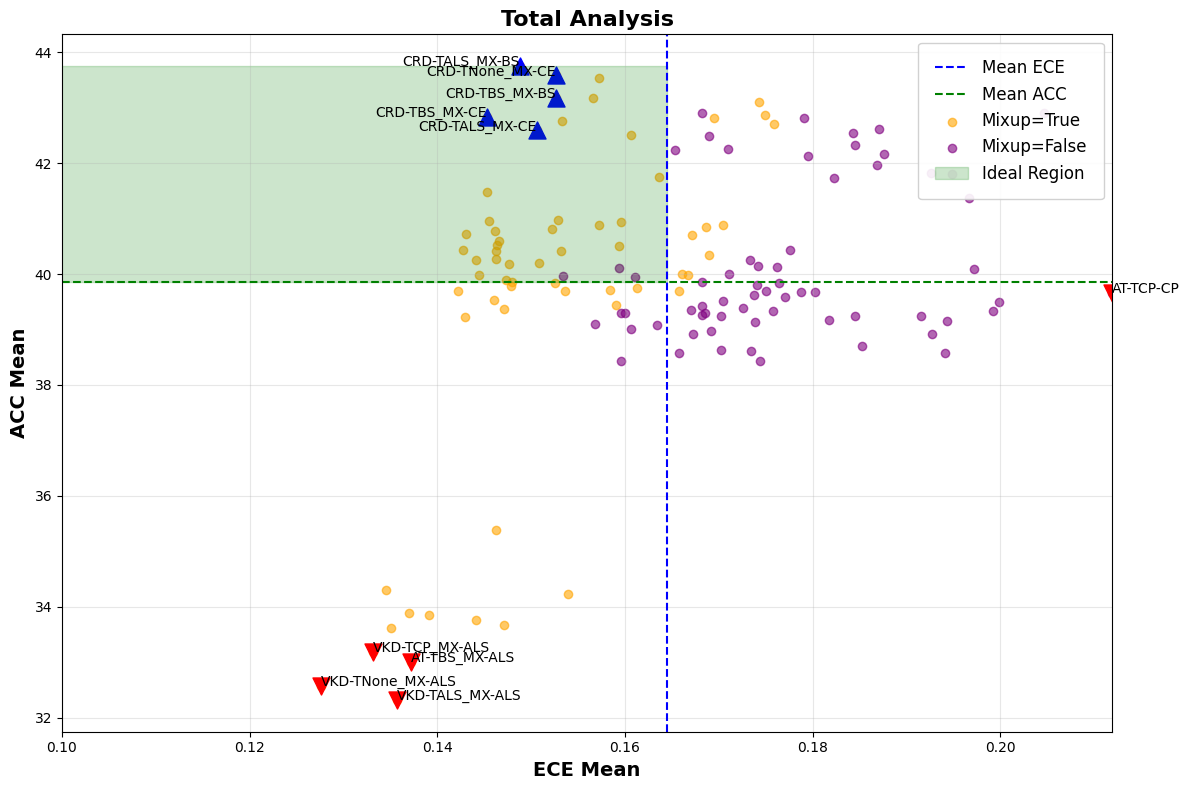

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Mixup 여부에 따른 데이터 분리
mixup_true = df[df["Mixup"] == "Mixup=True"]
mixup_false = df[df["Mixup"] == "Mixup=False"]

# Mixup=True 데이터 표시
plt.scatter(mixup_true["ECE Mean"], mixup_true["ACC Mean"], color="orange", alpha=0.6, label="Mixup=True")

# Mixup=False 데이터 표시
plt.scatter(mixup_false["ECE Mean"], mixup_false["ACC Mean"], color="purple", alpha=0.6, label="Mixup=False")

# Top 5 Harmonic Scores 강조
for i, row in top_5_normalized.iterrows():
    student_calibration_abbr = {
        "ALS": "ALS",
        "BalancedSoftmax": "BS",
        "ConfidencePenalty": "CP",
        "CE": "CE"
    }.get(row["Student Calibration"], row["Student Calibration"])
    label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
    plt.scatter(row["ECE Mean"], row["ACC Mean"], color="blue", marker="^", s=150, label="Top 5 Harmonic Scores" if i == 0 else "")
    plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="right")

# Bottom 5 Harmonic Scores 강조
for i, row in bottom_5_normalized.iterrows():
    student_calibration_abbr = {
        "ALS": "ALS",
        "BalancedSoftmax": "BS",
        "ConfidencePenalty": "CP",
        "CE": "CE"
    }.get(row["Student Calibration"], row["Student Calibration"])
    label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
    plt.scatter(row["ECE Mean"], row["ACC Mean"], color="red", marker="v", s=150, label="Bottom 5 Harmonic Scores" if i == 0 else "")
    plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="left")

# 평균선
plt.axvline(df["ECE Mean"].mean(), color="blue", linestyle="--", linewidth=1.5, label="Mean ECE")
plt.axhline(df["ACC Mean"].mean(), color="green", linestyle="--", linewidth=1.5, label="Mean ACC")

# Ideal Region 표시 (ECE <= 0.15 AND ACC >= ACC 평균)
ece_threshold = df["ECE Mean"].mean()
acc_threshold = df["ACC Mean"].mean()

plt.fill_betweenx(
    y=[acc_threshold, df["ACC Mean"].max()],  # ACC 범위
    x1=0, x2=ece_threshold,                  # ECE 범위
    color='green', alpha=0.2, label="Ideal Region"
)

# 그래프 설정
plt.title("Total Analysis", fontsize=16, fontweight="bold")
plt.xlabel("ECE Mean", fontsize=14, fontweight="bold")
plt.ylabel("ACC Mean", fontsize=14, fontweight="bold")
plt.xlim(0.10, df["ECE Mean"].max())
plt.legend(fontsize=12, loc="upper right", frameon=True, framealpha=0.9, borderpad=1)
plt.grid(alpha=0.3)
plt.tight_layout()

# 그래프 표시
plt.show()
